In [1]:
from combine import *

/opt/homebrew/Caskroom/miniforge/base/envs/hiwi/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Part 1: Machine Translation

### Reproduce Table 3: winning frequency for MT NLI metrics.

In [2]:
matrices = get_all_matrices('mt')

# ref adv
matrix1 = matrices['ref']['adv']

# ref MT-seg
matrix2 = matrices['ref']['mt-seg']

# src adv
matrix3 = matrices['src']['adv']

# src MT-seg
matrix4 = matrices['src']['mt-seg']

print('ref-adv')
print_wining_matrix(matrix1)
print('ref-MT-seg')
print_wining_matrix(matrix2)
print('src-adv')
print_wining_matrix(matrix3)
print('src-MT-seg')
print_wining_matrix(matrix4)


NLI1Score_monolingual--paws_back
NLI1Score_monolingual--paws_back
NLI1Score_monolingual--paws_para
NLI1Score_monolingual--paws_para
NLI1Score_monolingual--wmt20_google-de
NLI1Score_monolingual--wmt20_google-de
NLI1Score_monolingual--xpaws-de
NLI1Score_monolingual--xpaws-de
NLI2Score_monolingual--paws_back
NLI2Score_monolingual--paws_back
NLI2Score_monolingual--paws_para
NLI2Score_monolingual--paws_para
NLI2Score_monolingual--wmt20_google-de
NLI2Score_monolingual--wmt20_google-de
NLI2Score_monolingual--xpaws-de
NLI2Score_monolingual--xpaws-de
NLI1Score_monolingual--wmt15
NLI1Score_monolingual--wmt15
NLI1Score_monolingual--wmt16
NLI1Score_monolingual--wmt16
NLI1Score_monolingual--wmt17
NLI1Score_monolingual--wmt17
NLI1Score_monolingual--wmt20_mqm
NLI1Score_monolingual--wmt20_mqm
NLI1Score_monolingual--wmt21.news_mqm
NLI1Score_monolingual--wmt21.news_mqm
NLI2Score_monolingual--wmt15
NLI2Score_monolingual--wmt15
NLI2Score_monolingual--wmt16
NLI2Score_monolingual--wmt16
NLI2Score_monolingua

array([[0., 0., 0., 0., 0.],
       [1., 0., 2., 0., 0.],
       [1., 0., 6., 0., 0.]])

### Reproduce Table 4: accuracy of reference-based metrics for MT on adversarial datasets.

In [3]:
final = defaultdict(dict)
for i, metric in enumerate(metrics_dict['ref']):
    for nli in nli_dict['ref']:
        for dataset in datasets_dict['ref']['adv']:
            if dataset in ['paws_back', 'paws_para'] and metric == 'COMET_wmt20-comet-da':
                continue
            metric_data = combine_nli_and_metric(nli_metric=nli, metric=metric, dataset=dataset, adv=True, direction='avg', strategy='e')
            r = evaluate(metric_data, dataset=dataset, adv=True)
            if i == 0:
                final[nli][dataset] = np.mean(list(r[1.0].values()))
            final[metric][dataset] = np.mean(list(r[0.0].values()))


pprint.pprint(final)

defaultdict(<class 'dict'>,
            {'BARTScore_bart-large-cnn': {'paws_back': 0.7623888888888889,
                                          'paws_para': 0.43511111111111117,
                                          'wmt20_google-de': 0.495,
                                          'xpaws-de': 0.6344562259553888},
             'BARTScore_bart-large-cnn+para_bi': {'paws_back': 0.5915555555555555,
                                                  'paws_para': 0.6191111111111112,
                                                  'wmt20_google-de': 0.7622222222222222,
                                                  'xpaws-de': 0.7500589328963234},
             'BERTScore_roberta-large_L17_idf_version=0.3.11(hug_trans=4.17.0)': {'paws_back': 0.41538888888888886,
                                                                                  'paws_para': 0.4895,
                                                                                  'wmt20_google-de': 0.5011111111111111,


### Reproduce Table 5: accuracy of reference-free metrics for MT on adversarial datasets

In [4]:
final = defaultdict(dict)
for i, metric in enumerate(metrics_dict['src']):
    for nli in nli_dict['src']:
        for dataset in datasets_dict['src']['adv']:
            metric_data = combine_nli_and_metric(nli_metric=nli, metric=metric, dataset=dataset, adv=True,
                                                 direction='avg', strategy='e')
            r = evaluate(metric_data, dataset=dataset, adv=True)
            if i == 0:
                final[nli][dataset] = np.mean(list(r[1.0].values()))
            final[metric][dataset] = np.mean(list(r[0.0].values()))

pprint.pprint(final)

defaultdict(<class 'dict'>,
            {'COMET_wmt21-comet-qe-mqm': {'wmt20_google-de': 0.8138888888888888,
                                          'xpaws-de': 0.7313235151338721,
                                          'xpaws-fr': 0.7521326063200722,
                                          'xpaws-ja': 0.7514441085677489,
                                          'xpaws-zh': 0.7148896498712243},
             'NLI1Score_crosslingual(xlm-roberta-base+2)': {'wmt20_google-de': 0.7277777777777777,
                                                            'xpaws-de': 0.8303222458135604,
                                                            'xpaws-fr': 0.8288238871096656,
                                                            'xpaws-ja': 0.8318730970952576,
                                                            'xpaws-zh': 0.696820629545701},
             'NLI2Score_crosslingual(mDeBERTa-v3-base-mnli-xnli+0)': {'wmt20_google-de': 0.8016666666666666,
                  

### Reproduce Table 6(a): Correlations of reference-based metrics on MT standard bechmarks

In [18]:
final = defaultdict(lambda: defaultdict(dict))
for i, metric in enumerate(metrics_dict['ref']):
    for nli in nli_dict['ref']:
        for level in ['seg', 'sys']:
            for dataset in datasets_dict['ref'][f'mt-{level}']:
                # sentsim(wmd) has bugs with long texts; skipped.
                if dataset in datasets_dict['ref']['mt-sys'] and 'SentSim_new_WMD' in metric:
                    continue
                metric_data = combine_nli_and_metric(nli_metric=nli, metric=metric, dataset=dataset, adv=False,
                                                     direction='avg', strategy='e')
                r = evaluate(metric_data, dataset=dataset, adv=False)
                if i == 0:
                    final[nli][level][dataset] = np.mean(list(r[1.0].values()))
                final[metric][level][dataset] = np.mean(list(r[0.0].values()))

pprint.pprint(final)


defaultdict(<function <lambda> at 0x1766d9ca0>,
            {'BARTScore_bart-large-cnn': defaultdict(<class 'dict'>,
                                                     {'seg': {'wmt15': 0.7531099564222598,
                                                              'wmt16': 0.7163618057337994,
                                                              'wmt17': 0.7212746832667308,
                                                              'wmt20_mqm': 0.414154429675421,
                                                              'wmt21.news_mqm': 0.3279152426490498},
                                                      'sys': {'wmt20': 0.8352951726495519,
                                                              'wmt21.news': 0.6861350359038629}}),
             'BARTScore_bart-large-cnn+para_bi': defaultdict(<class 'dict'>,
                                                             {'seg': {'wmt15': 0.7683659373353805,
                                                 

### Reproduce Table 6(b): Correlations of reference-free metrics on MT standard bechmarks

In [6]:
final = defaultdict(lambda: defaultdict(dict))
for i, metric in enumerate(metrics_dict['src']):
    for nli in nli_dict['src']:
        for level in ['seg', 'sys']:
            for dataset in datasets_dict['src'][f'mt-{level}']:
                # sentsim(wmd) has bugs with long texts; skip
                if dataset in datasets_dict['src']['mt-sys'] and 'SentSim_new_WMD' in metric:
                    continue
                metric_data = combine_nli_and_metric(nli_metric=nli, metric=metric, dataset=dataset, adv=False,
                                                     direction='avg', strategy='e')
                r = evaluate(metric_data, dataset=dataset, adv=False)
                if i == 0:
                    final[nli][level][dataset] = np.mean(list(r[1.0].values()))
                final[metric][level][dataset] = np.mean(list(r[0.0].values()))

pprint.pprint(final)


defaultdict(<function <lambda> at 0x176636c10>,
            {'COMET_wmt21-comet-qe-mqm': defaultdict(<class 'dict'>,
                                                     {'seg': {'wmt15': 0.6328888366521872,
                                                              'wmt16': 0.611248861297684,
                                                              'wmt17': 0.6162414995159183,
                                                              'wmt20_mqm': 0.7437397743724722,
                                                              'wmt21.news_mqm': 0.4981741149001433},
                                                      'sys': {'wmt20': 0.7349346909396772,
                                                              'wmt21.news': 0.6610935526660878}}),
             'NLI1Score_crosslingual(xlm-roberta-base+2)': defaultdict(<class 'dict'>,
                                                                       {'seg': {'wmt15': 0.2306701555822117,
                             

### Reproduce Figure 1 and 2: average accuracy on adv. datasets and pearson correlation on WMT

In [17]:
def plot_MT_trade_off_lines(setup, level):
    datasets_adv = datasets_dict[setup]['adv']
    datasets_mt = datasets_dict[setup][f'mt-{level}']
    metrics = metrics_dict[setup]
    nlis = nli_dict[setup]

    pearson_dicts_all_dataset = defaultdict(lambda: defaultdict(list))
    for dataset in datasets_mt:
        nli1_data, nli2_data = defaultdict(dict), defaultdict(dict)
        for metric in metrics:
            if 'SentSim_new_WMD' in metric and level == 'sys':
                print('skip sentsim(wmd) for system-level evaluation.')
                continue
            pearson_dicts = defaultdict(list)
            acc_dicts = defaultdict(list)
            for nli in nlis:
                print(f"Evaluate {metric}+{nli} on {dataset} (MT)...")
                mt_data = combine_nli_and_metric(nli, metric, dataset, method=add_scores, adv=False)
                pearson_dict = evaluate(mt_data, dataset, adv=False)
                pearson_dicts[nli].append(pearson_dict)
                pearson_dicts_all_dataset[metric][nli].append(pearson_dict)
                for dt_adv in datasets_adv:
                    print(f"Evaluate {metric}+{nli} on {dt_adv} (adv.)...")
                    if 'COMET' in metric and setup == 'ref' and dt_adv not in ['wmt20_google-de', 'xpaws-de']:
                        print('skip for COMET: {}'.format(dt_adv))
                        continue
                    adv_data = combine_nli_and_metric(nli, metric, dt_adv, adv=True)
                    acc_dict = evaluate(metric_data=adv_data, dataset=dt_adv, adv=True)
                    acc_dicts[nli].append(acc_dict)

            assert len(acc_dicts[nlis[0]]) == len(datasets_adv) or (len(acc_dicts[nlis[0]]) == 2 and 'COMET' in metric and setup == 'ref')
            nli1_data['adv'][metric] = append_dict(acc_dicts[nlis[0]])  # return list of float
            nli2_data['adv'][metric] = append_dict(acc_dicts[nlis[1]])

    for metric in metrics:
        if 'SentSim_new_WMD' in metric and level == 'sys':
            print('skip sentsim(wmd) for system-level evaluation.')
            continue
        nli1_data['mt'][metric] = append_dict(pearson_dicts_all_dataset[metric][nlis[0]])
        nli2_data['mt'][metric] = append_dict(pearson_dicts_all_dataset[metric][nlis[1]])

    plot_trade_off(nli1_data, nli2_data, 'ALL', setup, level=level)

skip for COMET: paws_back
skip for COMET: paws_para
skip for COMET: paws_back
skip for COMET: paws_para
skip for COMET: paws_back
skip for COMET: paws_para
skip for COMET: paws_back
skip for COMET: paws_para
skip for COMET: paws_back
skip for COMET: paws_para
skip for COMET: paws_back
skip for COMET: paws_para
skip for COMET: paws_back
skip for COMET: paws_para
skip for COMET: paws_back
skip for COMET: paws_para
skip for COMET: paws_back
skip for COMET: paws_para
skip for COMET: paws_back
skip for COMET: paws_para
['BARTScore_bart-large-cnn', 'BARTScore_bart-large-cnn+para_bi', 'BERTScore_roberta-large_L17_idf_version=0.3.11(hug_trans=4.17.0)', 'BLEURT_BLEURT-20', 'COMET_wmt20-comet-da', 'MoverScore_bert_mnli_1-gram_idf(True)', 'SentSim_new_BERTScore_ref', 'SentSim_new_WMD_ref']


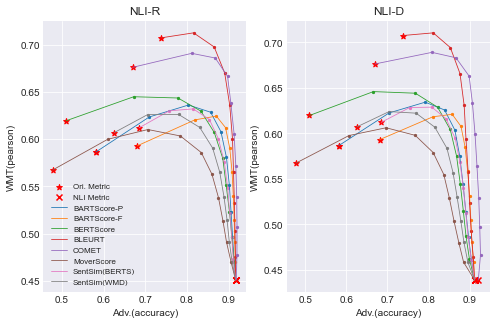

In [15]:
# ref seg
plot_MT_trade_off_lines('ref', 'seg')

Evaluate BARTScore_bart-large-cnn+NLI1Score_monolingual on MT wmt21.news (MT)...
Evaluate BARTScore_bart-large-cnn+NLI1Score_monolingual on paws_back (adv.)...
Evaluate BARTScore_bart-large-cnn+NLI1Score_monolingual on paws_para (adv.)...
Evaluate BARTScore_bart-large-cnn+NLI1Score_monolingual on wmt20_google-de (adv.)...
Evaluate BARTScore_bart-large-cnn+NLI1Score_monolingual on xpaws-de (adv.)...
Evaluate BARTScore_bart-large-cnn+NLI2Score_monolingual on MT wmt21.news (MT)...
Evaluate BARTScore_bart-large-cnn+NLI2Score_monolingual on paws_back (adv.)...
Evaluate BARTScore_bart-large-cnn+NLI2Score_monolingual on paws_para (adv.)...
Evaluate BARTScore_bart-large-cnn+NLI2Score_monolingual on wmt20_google-de (adv.)...
Evaluate BARTScore_bart-large-cnn+NLI2Score_monolingual on xpaws-de (adv.)...
Evaluate BARTScore_bart-large-cnn+para_bi+NLI1Score_monolingual on MT wmt21.news (MT)...
Evaluate BARTScore_bart-large-cnn+para_bi+NLI1Score_monolingual on paws_back (adv.)...
Evaluate BARTScore_b

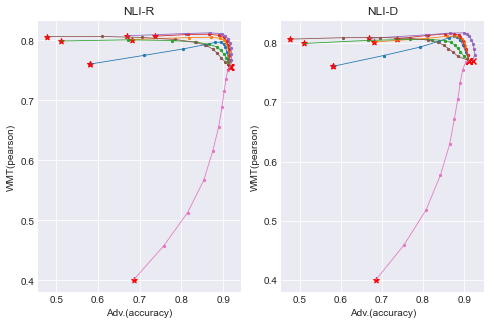

In [18]:
# ref sys
plot_MT_trade_off_lines('ref', 'sys')

Evaluate COMET_wmt21-comet-qe-mqm+NLI1Score_crosslingual(xlm-roberta-base+2) on MT wmt15 (MT)...
Evaluate COMET_wmt21-comet-qe-mqm+NLI1Score_crosslingual(xlm-roberta-base+2) on wmt20_google-de (adv.)...
Evaluate COMET_wmt21-comet-qe-mqm+NLI1Score_crosslingual(xlm-roberta-base+2) on xpaws-de (adv.)...
Evaluate COMET_wmt21-comet-qe-mqm+NLI1Score_crosslingual(xlm-roberta-base+2) on xpaws-fr (adv.)...
Evaluate COMET_wmt21-comet-qe-mqm+NLI1Score_crosslingual(xlm-roberta-base+2) on xpaws-zh (adv.)...
Evaluate COMET_wmt21-comet-qe-mqm+NLI1Score_crosslingual(xlm-roberta-base+2) on xpaws-ja (adv.)...
Evaluate COMET_wmt21-comet-qe-mqm+NLI2Score_crosslingual(mDeBERTa-v3-base-mnli-xnli+0) on MT wmt15 (MT)...
Evaluate COMET_wmt21-comet-qe-mqm+NLI2Score_crosslingual(mDeBERTa-v3-base-mnli-xnli+0) on wmt20_google-de (adv.)...
Evaluate COMET_wmt21-comet-qe-mqm+NLI2Score_crosslingual(mDeBERTa-v3-base-mnli-xnli+0) on xpaws-de (adv.)...
Evaluate COMET_wmt21-comet-qe-mqm+NLI2Score_crosslingual(mDeBERTa-v3-

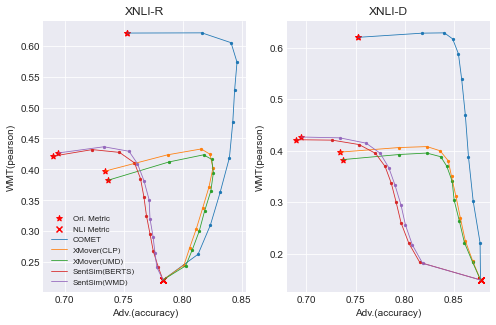

In [19]:
# src seg
plot_MT_trade_off_lines('src', 'seg')

Evaluate COMET_wmt21-comet-qe-mqm+NLI1Score_crosslingual(xlm-roberta-base+2) on MT wmt21.news (MT)...
Evaluate COMET_wmt21-comet-qe-mqm+NLI1Score_crosslingual(xlm-roberta-base+2) on wmt20_google-de (adv.)...
Evaluate COMET_wmt21-comet-qe-mqm+NLI1Score_crosslingual(xlm-roberta-base+2) on xpaws-de (adv.)...
Evaluate COMET_wmt21-comet-qe-mqm+NLI1Score_crosslingual(xlm-roberta-base+2) on xpaws-fr (adv.)...
Evaluate COMET_wmt21-comet-qe-mqm+NLI1Score_crosslingual(xlm-roberta-base+2) on xpaws-zh (adv.)...
Evaluate COMET_wmt21-comet-qe-mqm+NLI1Score_crosslingual(xlm-roberta-base+2) on xpaws-ja (adv.)...
Evaluate COMET_wmt21-comet-qe-mqm+NLI2Score_crosslingual(mDeBERTa-v3-base-mnli-xnli+0) on MT wmt21.news (MT)...
Evaluate COMET_wmt21-comet-qe-mqm+NLI2Score_crosslingual(mDeBERTa-v3-base-mnli-xnli+0) on wmt20_google-de (adv.)...
Evaluate COMET_wmt21-comet-qe-mqm+NLI2Score_crosslingual(mDeBERTa-v3-base-mnli-xnli+0) on xpaws-de (adv.)...
Evaluate COMET_wmt21-comet-qe-mqm+NLI2Score_crosslingual(mD

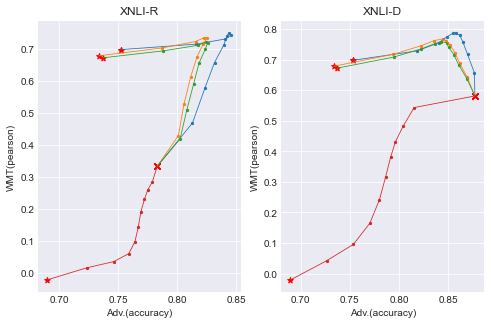

In [20]:
# src sys
plot_MT_trade_off_lines('src', 'sys')

### Reproduce Figure 3: improvements for MT + Adv.

In [9]:
#data = prepare_improvements_df_mt()

     setup                    metric  nli_weight   dataset  type  improvement  \
0      ref  BARTScore_bart-large-cnn         0.1     wmt15    MT     5.299565   
1      ref  BARTScore_bart-large-cnn         0.2     wmt15    MT     7.325892   
2      ref  BARTScore_bart-large-cnn         0.3     wmt15    MT     6.400389   
3      ref  BARTScore_bart-large-cnn         0.4     wmt15    MT     3.349422   
4      ref  BARTScore_bart-large-cnn         0.5     wmt15    MT    -0.905340   
...    ...                       ...         ...       ...   ...          ...   
2551   src       SentSim_new_WMD_src         0.5  xpaws-ja  Adv.    14.274405   
2552   src       SentSim_new_WMD_src         0.6  xpaws-ja  Adv.    14.813235   
2553   src       SentSim_new_WMD_src         0.7  xpaws-ja  Adv.    15.775957   
2554   src       SentSim_new_WMD_src         0.8  xpaws-ja  Adv.    16.829764   
2555   src       SentSim_new_WMD_src         0.9  xpaws-ja  Adv.    18.958545   

      improvement_nli      

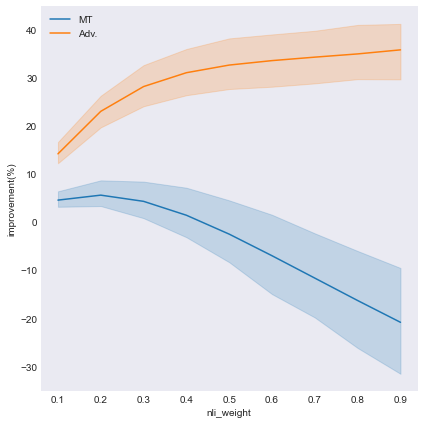

In [7]:
data = pd.read_csv('../results/all_improvements_data_mt.csv')
data['type'] = ['Adv.' if t == 'adv' else 'MT' for t in data['type']]

plt.figure(figsize=(6, 6))
sns.lineplot(data=data, x='nli_weight', y='improvement', hue='type', estimator='mean')
plt.legend(loc='upper left')
plt.ylabel('improvement(%)')
plt.tight_layout()
plt.show()

### Reproduce Table 9 and 10

In [ ]:
#prepare_improvement_table_data(setup='ref', level='seg')
#prepare_improvement_table_data(setup='ref', level='sys')
#prepare_improvement_table_data(setup='src', level='seg')
#prepare_improvement_table_data(setup='src', level='sys')

In [12]:
def generate_improvement_table_mt(setup):
    data_seg = pd.read_csv('../results/{}_improvement_table_data_{}_mt.csv'.format(setup, 'seg'))
    data_sys = pd.read_csv('../results/{}_improvement_table_data_{}_mt.csv'.format(setup, 'sys'))
    final_data = defaultdict(list)
    for metric in list(set(data_seg['metric'])):
        # adv.
        metric_data = data_seg[(data_seg['metric'] == metric) & (data_seg['type']=='Adv.')]
        mean_metric_data = metric_data.groupby(by=['metric', 'type']).mean()
        final_data['metric'].append(metric)
        final_data['dataset'].append('Adv.')
        final_data['ori.'].append("%.3f" % mean_metric_data['ori'].values[0])
        for w in np.arange(0.1,1,0.1):
            w = float("%.1f" % w)
            final_data[w].append('{:.3f}({}{:.1f})'.format(mean_metric_data['combined-{}'.format(w)].values[0],
                                                           '+' if mean_metric_data['improvement-{}'.format(w)].values[
                                                                      0] > 0 else '',
                                                           mean_metric_data['improvement-{}'.format(w)].values[0]))

        # MT-seg
        metric_data = data_seg[(data_seg['metric'] == metric) & (data_seg['type'] == 'MT')]
        mean_metric_data = metric_data.groupby(by=['metric', 'type']).mean()
        final_data['metric'].append(metric)
        final_data['dataset'].append('MT-seg')
        final_data['ori.'].append("%.3f" % mean_metric_data['ori'].values[0])
        for w in np.arange(0.1, 1, 0.1):
            w = float("%.1f" % w)
            final_data[w].append('{:.3f}({}{:.1f})'.format(mean_metric_data['combined-{}'.format(w)].values[0],
                                                           '+' if mean_metric_data['improvement-{}'.format(w)].values[
                                                                      0] > 0 else '',
                                                           mean_metric_data['improvement-{}'.format(w)].values[0]))

        # MT-sys
        metric_data = data_sys[(data_sys['metric'] == metric) & (data_sys['type'] == 'MT')]
        mean_metric_data = metric_data.groupby(by=['metric', 'type']).mean()
        final_data['metric'].append(metric)
        final_data['dataset'].append('MT-sys')
        if 'SentSim_new_WMD' not in metric:
            final_data['ori.'].append("%.3f" % mean_metric_data['ori'].values[0])
        else:
            final_data['ori.'].append('-')
        for w in np.arange(0.1, 1, 0.1):
            w = float("%.1f" % w)
            if 'SentSim_new_WMD' not in metric:
                final_data[w].append('{:.3f}({}{:.1f})'.format(mean_metric_data['combined-{}'.format(w)].values[0],
                                                               '+' if mean_metric_data['improvement-{}'.format(w)].values[0]>0 else '',
                                                                mean_metric_data['improvement-{}'.format(w)].values[0]))
            else:
                final_data[w].append('-')

    final_data = pd.DataFrame.from_dict(final_data)
    final_data.to_csv('../results/final_improvement_{}_mt.csv'.format(setup), index=False)
    print(final_data)

In [13]:
generate_improvement_table_mt('ref')

                                               metric dataset   ori.  \
0                                    BLEURT_BLEURT-20    Adv.  0.738   
1                                    BLEURT_BLEURT-20  MT-seg  0.708   
2                                    BLEURT_BLEURT-20  MT-sys  0.807   
3                    BARTScore_bart-large-cnn+para_bi    Adv.  0.681   
4                    BARTScore_bart-large-cnn+para_bi  MT-seg  0.593   
5                    BARTScore_bart-large-cnn+para_bi  MT-sys  0.802   
6                                 SentSim_new_WMD_ref    Adv.  0.626   
7                                 SentSim_new_WMD_ref  MT-seg  0.607   
8                                 SentSim_new_WMD_ref  MT-sys      -   
9                            BARTScore_bart-large-cnn    Adv.  0.582   
10                           BARTScore_bart-large-cnn  MT-seg  0.587   
11                           BARTScore_bart-large-cnn  MT-sys  0.761   
12                               COMET_wmt20-comet-da    Adv.  0

In [14]:
generate_improvement_table_mt('src')

                       metric dataset    ori.           0.1           0.2  \
0             XMoverScore_CLP    Adv.   0.734   0.790(+7.7)  0.819(+11.7)   
1             XMoverScore_CLP  MT-seg   0.397   0.415(+5.5)   0.421(+7.4)   
2             XMoverScore_CLP  MT-sys   0.679   0.710(+4.6)   0.735(+8.2)   
3    COMET_wmt21-comet-qe-mqm    Adv.   0.753   0.817(+8.6)  0.841(+11.8)   
4    COMET_wmt21-comet-qe-mqm  MT-seg   0.620   0.625(+0.7)   0.617(-0.5)   
5    COMET_wmt21-comet-qe-mqm  MT-sys   0.698   0.722(+3.4)   0.743(+6.4)   
6   SentSim_new_BERTScore_src    Adv.   0.690   0.725(+5.1)   0.750(+8.8)   
7   SentSim_new_BERTScore_src  MT-seg   0.421   0.426(+2.1)   0.420(+1.3)   
8   SentSim_new_BERTScore_src  MT-sys  -0.021  0.030(+40.4)  0.066(+52.0)   
9             XMoverScore_UMD    Adv.   0.737   0.791(+7.4)  0.820(+11.3)   
10            XMoverScore_UMD  MT-seg   0.383   0.402(+6.0)   0.409(+8.2)   
11            XMoverScore_UMD  MT-sys   0.672   0.701(+4.3)   0.723(+7.6)   

## Part 2: Summarization

### Reproduce Table 7: winning frequency for summarization NLI metrics

In [2]:
matrices = get_all_matrices('sum')

# ref adv
matrix1 = matrices[False]['adv']

# ref MT-seg
matrix2 = matrices[False]['sum']

# src adv
matrix3 = matrices[True]['adv']

# src MT-seg
matrix4 = matrices[True]['sum']

print('ref-adv')
print_wining_matrix(matrix1)
print('ref-sum')
print_wining_matrix(matrix2)
print('src-adv')
print_wining_matrix(matrix3)
print('src-sum')
print_wining_matrix(matrix4)

NLI1Score_monolingual--summ_google
NLI2Score_monolingual--summ_google
NLI1Score_monolingual--Rank19
NLI2Score_monolingual--Rank19
NLI1Score_monolingual--summ
NLI2Score_monolingual--summ
NLI1Score_monolingual--realsumm
NLI2Score_monolingual--realsumm
NLI1Score_monolingual--summ_google
NLI2Score_monolingual--summ_google
NLI1Score_monolingual--summ
NLI1Score_monolingual--summ
NLI2Score_monolingual--summ
NLI2Score_monolingual--summ
NLI1Score_monolingual--realsumm
NLI2Score_monolingual--realsumm
ref-adv
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
ref-sum
[[ 0.  2.  0.  1.  0.]
 [ 2.  0.  1. 10.  0.]
 [ 1.  1.  1.  0.  1.]]
src-adv
[[0. 3. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
src-sum
[[ 0. 12.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


array([[ 0., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

### Reproduce Table 13, 14 and 17: accuracy and correlation of summarization metrics

In [3]:
make_table_sum(direction='hr', strategy='e-c', agg='max', use_article=False)
make_table_sum(direction='hr', strategy='e-c', agg='mean', use_article=False)
make_table_sum(direction='rh', strategy='-c', agg=None, use_article=True)

# consistent setting
make_table_sum(direction='avg', strategy='e', agg='max', use_article=False)
make_table_sum(direction='avg', strategy='e', agg='mean', use_article=False)

defaultdict(<class 'dict'>,
            {'realsumm': {'BARTScore_bart-large-cnn': {'summary': 0.4781078400301716,
                                                       'system': 0.5309584244634032},
                          'BARTScore_bart-large-cnn+para_bi': {'summary': 0.582589639366533,
                                                               'system': 0.6871432684440233},
                          'BERTScore_roberta-large_L17_idf_version=0.3.11(hug_trans=4.17.0)': {'summary': 0.5737708631781988,
                                                                                               'system': 0.38026400132395893},
                          'DiscoScore_DS_Focus_NN': {'summary': -0.19935764400604247,
                                                     'system': -0.06642899152272816},
                          'MoverScore_bert_mnli_1-gram_idf(True)': {'summary': 0.5848004670974267,
                                                                    'system': 0.500581436

defaultdict(dict,
            {'summ': {'BARTScore_bart-large-cnn': {'coherence': 0.48529411764705876,
               'consistency': 0.1764705882352941,
               'fluency': 0.3763863263545405,
               'relevance': 0.49999999999999994},
              'NLI1Score_monolingual': {'coherence': 0.07352941176470587,
               'consistency': 0.5588235294117646,
               'fluency': 0.3616260782622056,
               'relevance': 0.20588235294117643},
              'NLI2Score_monolingual': {'coherence': 0.0588235294117647,
               'consistency': 0.48529411764705876,
               'fluency': 0.34686583016987066,
               'relevance': 0.2794117647058823},
              'BARTScore_bart-large-cnn+para_bi': {'coherence': 0.5147058823529411,
               'consistency': 0.20588235294117643,
               'fluency': 0.3173453339852008,
               'relevance': 0.5294117647058822},
              'BERTScore_roberta-large_L17_idf_version=0.3.11(hug_trans=4.17.0)':

### Reproduce Figure 12 and 13

In [ ]:
#combined_sum(use_article=True)
#combined_sum(use_article=False)

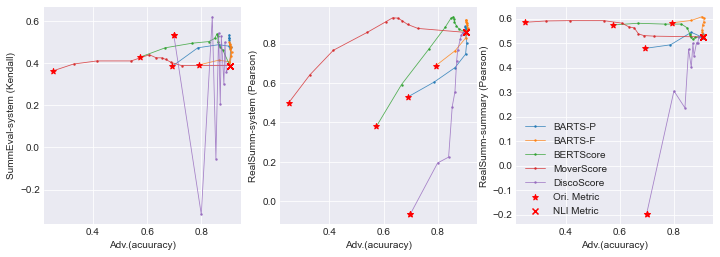

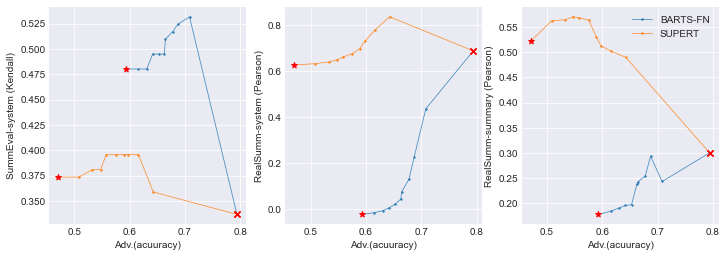

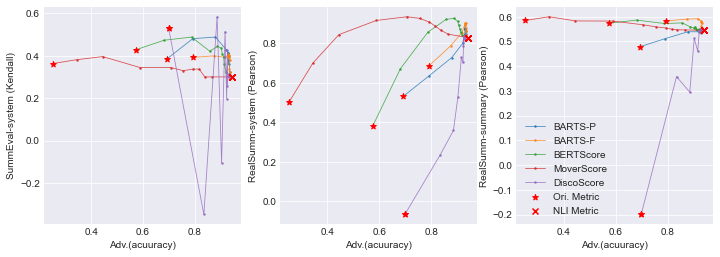

In [2]:
plot_sum_trade_off('ref', con=False)
plot_sum_trade_off('src', con=False)

plot_sum_trade_off('ref', con=True)

### Reproduce Figure 4: median improvements for summarization metrics

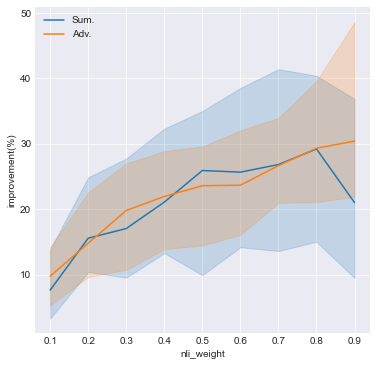

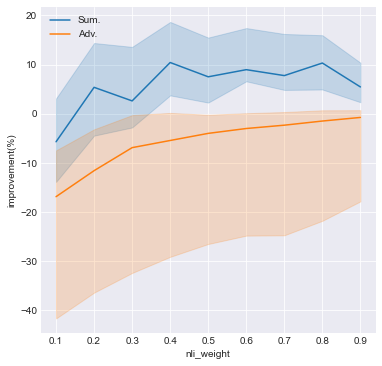

In [3]:
plot_sum_confidence()